In [2]:
## Imports & Setup
import numpy as np
import matplotlib.pyplot as plt
import padasip as pa
import statsmodels.api as sm
np.random.seed(420)

In [357]:
## Data Creation 

samples, features, scale = 500, 30, 5

X = np.random.rand(samples, features)

wTrue = np.random.randn(features, 1)

y_true = X @ wTrue

# Implements a scale for the noise
y = y_true + 1/scale * np.random.randn(samples, 1)

In [358]:
def mse(A, B):
    return (np.square(A - B)).mean()

In [359]:
## Closed linear regression 
def linReg(X, y):
    weights = np.linalg.inv(X.T @ X) @ X.T @ y
    preds = X @ weights
    return preds, weights

In [360]:
def linRegGD(X, y, iters, l=0.00001):
    weights = np.zeros((features, 1))
    
    iterations = np.empty(iters)
    for i in range(iters):
        update = 2 * X.T @ ((X @ weights) - y)
        weights = weights - l * update
        iterations[i] = np.linalg.norm(y - X @ weights)
    
    preds = X @ weights
    return preds, weights, iterations

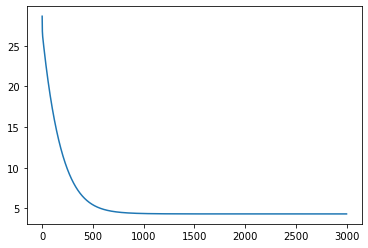

In [361]:
predsGD, weightsGD, iterationsGD = linRegGD(X, y, 3000, 0.00005)

plt.plot(iterationsGD)

In [362]:
def linRegSGD(X, y, iters, l=0.05):
    weights = np.zeros((X.shape[1], 1))
    iterations = np.empty(iters)
    
    for i in range(iters):  
        j = np.floor(np.random.rand()*X.shape[0]).astype(int)
        error = (X[j] @ weights) - y[j]
        update = error * X[j].T
        weights = weights - l * update.reshape(update.shape[0], 1)
      
        iterations[i] = np.linalg.norm(X @ weights - y)
        
    preds = X @ weights
    return preds, weights, iterations

In [363]:
def linRegSGD_smoothed(X, y, iters, lb=0.05, le=None):
    if(le==None):
        le = lb/10
    weights = np.zeros((X.shape[1], 1))
    #decrease learning rate through iterations
    l = np.linspace(lb,le,iters)
    iterations = np.empty(iters)
    
    for i in range(iters):  
        j = np.floor(np.random.rand()*X.shape[0]).astype(int)
        update = ((X[j] @ weights) - y[j]) * X[j].T
        weights = weights - l[i] * update.reshape(update.shape[0], 1)
      
        iterations[i] = np.linalg.norm(X @ weights - y)
        
    preds = X @ weights
    return preds, weights, iterations

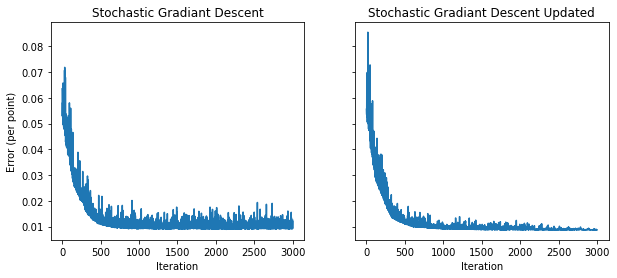

In [392]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True)
predsSGD, weightsSGD, iterationsSGD = linRegSGD(X, y, 3000, 0.06)
ax[0].plot(iterationsSGD/len(X))
ax[0].set_title("Stochastic Gradiant Descent")
ax[0].set_ylabel("Error (per point)")
ax[0].set_xlabel("Iteration")
predsSGD2, weightsSGD2, iterationsSGD2 = linRegSGD_smoothed(X, y, 3000, 0.06)
ax[1].plot(iterationsSGD2/len(X))
ax[1].set_title("Stochastic Gradiant Descent Updated")
ax[1].set_xlabel("Iteration")
fig.savefig("SGDFixed")

Weights MSE:  0.0007484953175743389
Weights MSE:  0.000750828867163986
Weights MSE:  0.0012485579635218918


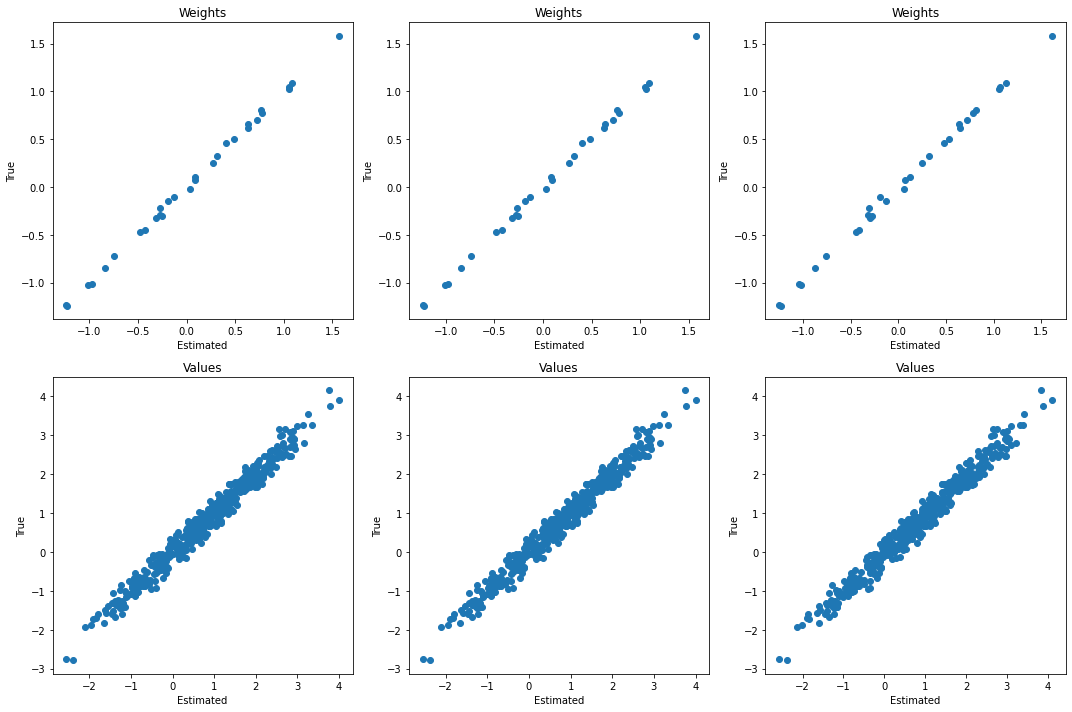

In [394]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
cols = ['Closed Linear Regression', 'Linear Gradiant Descent', 'Linear Stochastic Gradiant Descent']
for axs, col in zip(ax[0], cols):
    axs.set_title(col)

preds, weights = linReg(X, y)
print("Weights MSE: ",mse(weights, wTrue))

ax[0, 0].scatter(weights, wTrue)
ax[0, 0].set_ylabel("True")
ax[0, 0].set_xlabel("Estimated")
ax[0, 0].set_title("Weights")
ax[1, 0].scatter(preds, y)
ax[1, 0].set_title("Values")
ax[1, 0].set_ylabel("True")
ax[1, 0].set_xlabel("Estimated")

preds, weights, iterationsGD = linRegGD(X, y, 3000, 0.00005)
print("Weights MSE: ",mse(weights, wTrue))

ax[0, 1].scatter(weights, wTrue)
ax[0, 1].set_ylabel("True")
ax[0, 1].set_xlabel("Estimated")
ax[0, 1].set_title("Weights")
ax[1, 1].scatter(preds, y)
ax[1, 1].set_title("Values")
ax[1, 1].set_ylabel("True")
ax[1, 1].set_xlabel("Estimated")

preds, weights, iterationsSGD = linRegSGD(X, y, 3000, 0.06)
print("Weights MSE: ",mse(weights, wTrue))

ax[0, 2].scatter(weights, wTrue)
ax[0, 2].set_ylabel("True")
ax[0, 2].set_xlabel("Estimated")
ax[0, 2].set_title("Weights")
ax[1, 2].scatter(preds, y)
ax[1, 2].set_title("Values")
ax[1, 2].set_ylabel("True")
ax[1, 2].set_xlabel("Estimated")

fig.tight_layout()
fig.savefig("LinRegComparison")

4.322017478331773
6.211226124396888


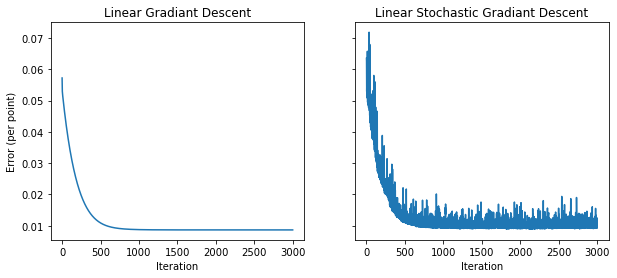

In [393]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True)
ax[0].plot(iterationsGD/len(X))
ax[0].set_title("Linear Gradiant Descent")
ax[0].set_ylabel("Error (per point)")
ax[0].set_xlabel("Iteration")
ax[1].plot(iterationsSGD/len(X))
ax[1].set_title("Linear Stochastic Gradiant Descent")
ax[1].set_xlabel("Iteration")
fig.savefig("GD vs SGD")
print(iterationsGD[-1])
print(iterationsSGD[-1])

Weights MSE:  0.003737807025432581


<ipython-input-391-6754eb4fc927>:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-391-6754eb4fc927>:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-391-6754eb4fc927>:97: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


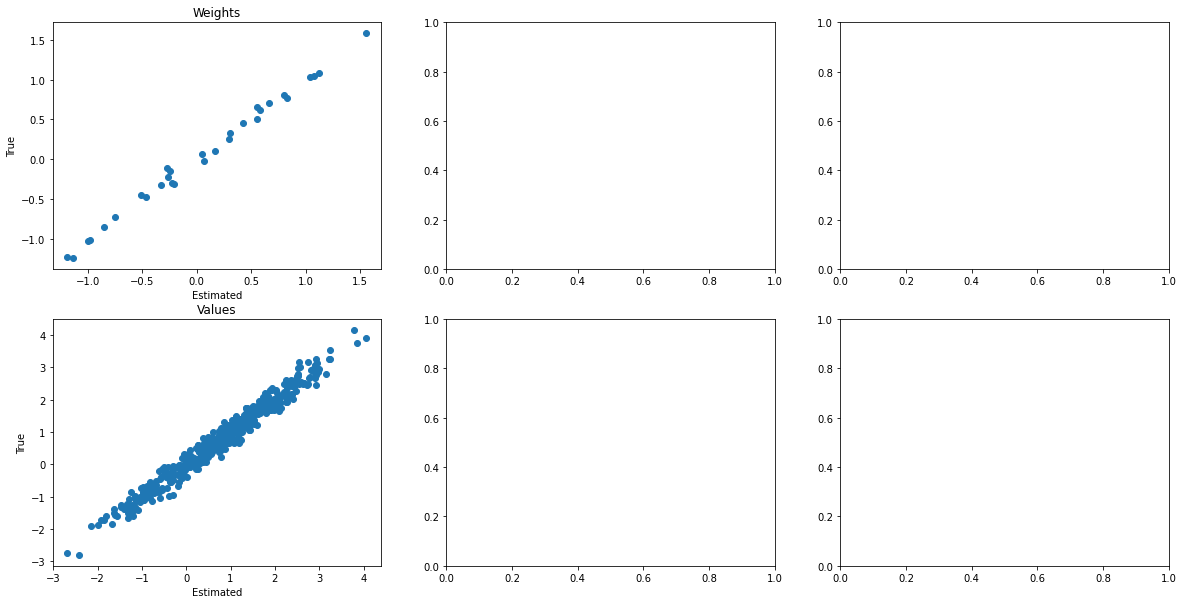

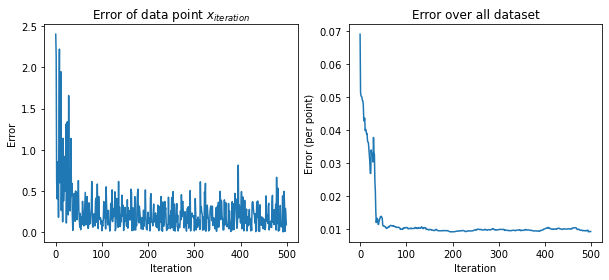

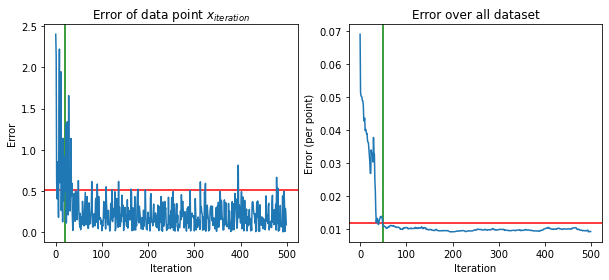

In [391]:
def RLS(X, y, lam, eps=0.01):
    #initialisations
    weights = np.zeros((X.shape[1], 1))
    P = (1/eps)*np.identity((X.shape[1]))
    lami = lam**(-1)

    #vis initialisations
    iterError = np.empty(X.shape[0])
    errorAll = np.empty((X.shape[0]))
    randError = np.empty((X.shape[0]))
    

    for i in range(X.shape[0]):
       #algorithm
        xn = X[i].reshape(-1, 1)
        pred = weights.T @ xn 
        error = y[i] - pred
        k = (lami * P @ xn) / (1 + lami * xn.T @ P @ xn)
        P = (lami * P) - (lami * k @ xn.T @ P)  
        weights += (k * error)
        
        #visualisation
        iterError[i] = np.linalg.norm(error)
        errorAll[i] = np.linalg.norm(y - X @ weights)
        j = np.floor(np.random.rand()*X.shape[0]).astype(int)
        randError[i] = np.linalg.norm(y[j] - weights.T @ X[j])
     
    return weights, iterError, errorAll, randError

weights, iterError, errorAll, randError = RLS(X, y, 0.98)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

print("Weights MSE: ",mse(weights, wTrue))
ax[0,0].scatter(weights, wTrue)
ax[0,0].set_ylabel("True")
ax[0,0].set_xlabel("Estimated")
ax[0,0].set_title("Weights")
ax[1,0].scatter(X @ weights, y)
ax[1,0].set_ylabel("True")
ax[1,0].set_xlabel("Estimated")
ax[1,0].set_title("Values")

fig.show()
fig.savefig("RLS Weights")

errorAll = errorAll/len(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=False)
ax[0].plot(iterError)
ax[1].plot(errorAll)
ax[0].set_ylabel("Error")
ax[0].set_xlabel("Iteration")
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("Error (per point)")

ax[0].set_title("Error of data point $x_{iteration}$")
ax[1].set_title("Error over all dataset")
fig.show()
fig.savefig("RLS Error of points")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

## Find iteration of convergence
iterationLim = np.mean(iterError)+np.std(iterError)
iOfConv1 = len(errorAll)
for i in range(len(errorAll)):
    restOfListIters = iterError[i:]
    numBelow = np.count_nonzero((restOfListIters < iterationLim))
    
    if(numBelow/len(restOfListIters) > 0.95):
        iOfConv1 = i
        break
        
ax[0].axhline(np.mean(iterError)+np.std(iterError), color='r')
ax[0].axvline(iOfConv1, color='g')
ax[0].plot(iterError)
ax[0].set_title("Error of data point $x_{iteration}$")

iOfConv = len(errorAll)
for i in range(len(errorAll)):
    restOfListIters = errorAll[i:]
    
    if(all(restOfListIters< np.mean(errorAll))):
        iOfConv = i
        break
        
ax[1].axvline(iOfConv, color='g')
ax[1].axhline(np.mean(errorAll), color='r')
ax[1].plot(errorAll)
ax[1].set_title("Error over all dataset")

ax[0].set_ylabel("Error")
ax[1].set_ylabel("Error (per point)")
ax[0].set_xlabel("Iteration")
ax[1].set_xlabel("Iteration")
fig.show()
fig.savefig("RLS Error W Lines")



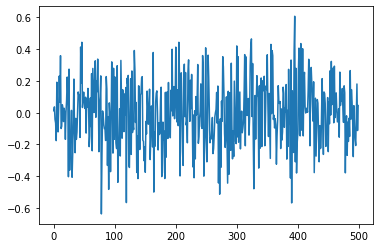

In [383]:
plt.plot((y - X @ weights))

Features:  5
Features:  20
Features:  50
Features:  100
Features:  200
Features:  400


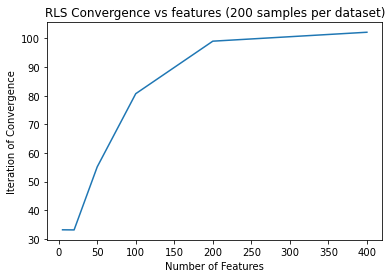

In [168]:
import math
featuresList = [5, 20, 50, 100, 200,400]
nsamples = 50

featureSpace = np.empty(len(featuresList))

for f in range(len(featuresList)):
    lfeatures = math.floor(featuresList[f])
    sampleList = np.empty(nsamples)
    print("Features: ", lfeatures)
    
    for s in range(nsamples):
        ## Data Creation
        dsamples, dscale = 200, 5
        Xs = np.random.rand(dsamples, lfeatures)
        wTrues = np.random.randn(lfeatures, 1)
        ys = Xs @ wTrues + 1/dscale * np.random.randn(dsamples, 1)
    
        ## Run RLS
        weights, iterError, errorAll, randError = RLS(Xs, ys, 0.98)
        
        ## Find iteration of convergence
        iOfConv = len(errorAll)
        for i in range(len(errorAll)):
            restOfListIters = errorAll[i:]
    
            if(all(restOfListIters< np.mean(errorAll))):
                iOfConv = i
                break
        
        ## Store iteration of convergence
        sampleList[s] = iOfConv
        
    featureSpace[f] = np.mean(sampleList)
    
plt.plot(featuresList, featureSpace)
plt.title("RLS Convergence vs features (200 samples per dataset)")
plt.xlabel("Number of Features")
plt.ylabel("Iteration of Convergence")
plt.savefig("RLSConvergence")

In [198]:
import pandas as pd

In [199]:
allData = pd.read_csv("parkinsons_updrs.data")

In [200]:
allData.columns

Index(['subject', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [210]:
allDataTrunc = allData.drop(labels=['age','sex','test_time','motor_UPDRS'], axis=1)

# set the index to be this and don't drop
allDataTrunc.set_index(keys=['subject'], drop=False,inplace=True)

# get a list of names
subjs=allDataTrunc['subject'].unique().tolist()

print(len(subjs))

minRows = 1000
for s in subjs:
    S = allDataTrunc.loc[allDataTrunc.subject==s]
    if(len(S)<minRows):
        minRows = len(S)

42


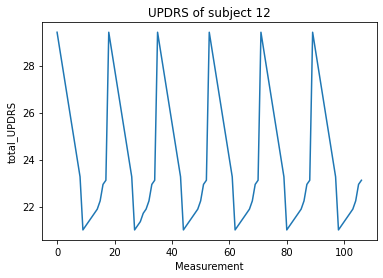

In [229]:
s = np.floor(np.random.rand()*len(subjs)).astype(int)

# now we can perform a lookup on a 'view' of the dataframe
S1 = allDataTrunc.loc[allDataTrunc.subject==s]
S1 = S1.drop(labels='subject', axis=1)
S1 = S1.reset_index()
S1 = S1.drop(labels='subject', axis=1)
S1X = S1.drop(labels='total_UPDRS', axis=1).to_numpy()
S1Y = S1['total_UPDRS'].to_numpy().reshape(-1,1)

title = "UPDRS of subject " + str(s)
plt.plot(S1Y)
plt.ylabel("total_UPDRS")
plt.xlabel("Measurement")
plt.title(title)
plt.savefig("Parks true single")

0.31335007565854234
107


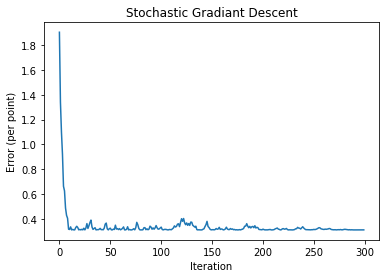

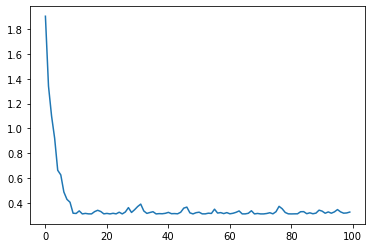

In [243]:
predsSGD, weightsSGD, iterationsSGD = linRegSGD_smoothed(S1X, S1Y, 300,0.0005)
print(iterationsSGD[-1]/len(S1X))
print(len(S1X))
plt.plot(iterationsSGD/len(S1X))
plt.title("Stochastic Gradiant Descent")
plt.ylabel("Error (per point)")
plt.xlabel("Iteration")
plt.savefig("Parks SGD single")
plt.show()

plt.plot(iterationsSGD[:100]/len(S1X))


0.2334768023389016


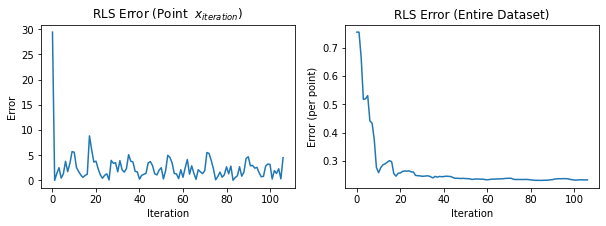

In [356]:
weights, iterError, errorAll, randError = RLS(S1X, S1Y, 0.98)
print(errorAll[-1]/len(S1X))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

ax[0].plot(iterError)
ax[0].set_title("RLS Error (Point  $x_{iteration}$)")
ax[0].set_ylabel("Error")
ax[0].set_xlabel("Iteration")

ax[1].plot(errorAll/len(S1X))
ax[1].set_title("RLS Error (Entire Dataset)")
ax[1].set_ylabel("Error (per point)")
ax[1].set_xlabel("Iteration")

fig.savefig("Parks RLS single")

In [348]:
resSGD = np.empty((len(subjs), minRows))
resRLS = np.empty((len(subjs), minRows))

for s in subjs:
    ## get from data
    S = allDataTrunc.loc[allDataTrunc.subject==s]
    S = S.drop(labels='subject', axis=1)
    S = S.reset_index()
    S = S.drop(labels='subject', axis=1)
    
    ## create features and targets
    SX = S.drop(labels='total_UPDRS', axis=1).to_numpy()
    SY = S['total_UPDRS'].to_numpy().reshape(-1,1)
    
    ## SGD
    predsSGD, weightsSGD, iterationsSGD = linRegSGD(SX, SY, 300,0.0005)

    ## RLS
    weights, iterErrorRLS, errorAllRLS, randError = RLS(SX, SY, 0.98)
    
    ## Save results
    resSGD[s-1] = iterationsSGD[:minRows]/minRows
    resRLS[s-1] = errorAllRLS[:minRows]/minRows

0.2908487837954289
0.54960425095308


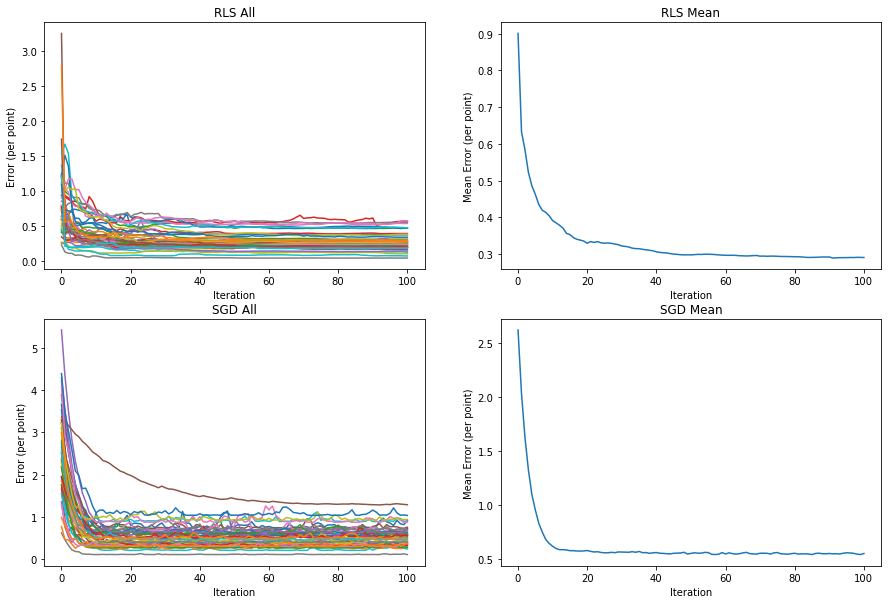

In [353]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
for r in range(len(resRLS)):
    ax[0, 0].plot(resRLS[r])
ax[0, 0].set_title("RLS All")
ax[0, 0].set_ylabel("Error (per point)")
ax[0, 0].set_xlabel("Iteration")
ax[0, 1].set_title("RLS Mean")
ax[0, 1].plot(np.mean(resRLS, axis=0))
ax[0, 1].set_ylabel("Mean Error (per point)")
ax[0, 1].set_xlabel("Iteration")

ax[1, 0].set_title("SGD All")
for r in range(len(resSGD)):
    ax[1, 0].plot(resSGD[r])
ax[1, 0].set_ylabel("Error (per point)")
ax[1, 0].set_xlabel("Iteration")
ax[1, 1].set_title("SGD Mean")
ax[1, 1].plot(np.mean(resSGD, axis=0))
ax[1, 1].set_ylabel("Mean Error (per point)")
ax[1, 1].set_xlabel("Iteration")
print(np.mean(resRLS, axis=0)[-1])
print(np.mean(resSGD, axis=0)[-1])
plt.savefig("ParkinsonsALL")

In [397]:
import numpy as np

from padasip.filters.base_filter import AdaptiveFilter

class FilterRLS(AdaptiveFilter):
    """
    Adaptive RLS filter.
    
    **Args:**

    * `n` : length of filter (integer) - how many input is input array
      (row of input matrix)

    **Kwargs:**

    * `mu` : forgetting factor (float). It is introduced to give exponentially
      less weight to older error samples. It is usually chosen
      between 0.98 and 1.

    * `eps` : initialisation value (float). It is usually chosen
      between 0.1 and 1.

    * `w` : initial weights of filter. Possible values are:
        
        * array with initial weights (1 dimensional array) of filter size
    
        * "random" : create random weights
        
        * "zeros" : create zero value weights
    """ 

    def __init__(self, n, mu=0.99, eps=0.1, w="random"):
        self.kind = "RLS filter"
        if type(n) == int:
            self.n = n
        else:
            raise ValueError('The size of filter must be an integer') 
        self.mu = self.check_float_param(mu, 0, 1, "mu")
        self.eps = self.check_float_param(eps, 0, 1, "eps")
        self.init_weights(w, self.n)
        self.R = 1/self.eps * np.identity(n)
        self.w_history = False

    def adapt(self, d, x):
        """
        Adapt weights according one desired value and its input.

        **Args:**

        * `d` : desired value (float)

        * `x` : input array (1-dimensional array)
        """
        y = np.dot(self.w, x)
        e = d - y
        R1 = np.dot(np.dot(np.dot(self.R,x),x.T),self.R)
        R2 = self.mu + np.dot(np.dot(x,self.R),x.T)
        self.R = 1/self.mu * (self.R - R1/R2)
        dw = np.dot(self.R, x.T) * e
        self.w += dw


    def run(self, d, x):
        """
        This function filters multiple samples in a row.

        **Args:**

        * `d` : desired value (1 dimensional array)

        * `x` : input matrix (2-dimensional array). Rows are samples,
            columns are input arrays.

        **Returns:**

        * `y` : output value (1 dimensional array).
          The size corresponds with the desired value.

        * `e` : filter error for every sample (1 dimensional array).
          The size corresponds with the desired value.

        * `w` : history of all weights (2 dimensional array).
          Every row is set of the weights for given sample.
        """
        # measure the data and check if the dimmension agree
        N = len(x)
        if not len(d) == N:
            raise ValueError('The length of vector d and matrix x must agree.')  
        self.n = len(x[0])
        # prepare data
        try:    
            x = np.array(x)
            d = np.array(d)
        except:
            raise ValueError('Impossible to convert x or d to a numpy array')
        # create empty arrays
        y = np.zeros(N)
        e = np.zeros(N)
        self.w_history = np.zeros((N, self.n))
        # adaptation loop
        for k in range(N):
            self.w_history[k,:] = self.w
            y[k] = np.dot(self.w, x[k])
            e[k] = d[k] - y[k]
            R1 = np.dot(np.dot(np.dot(self.R,x[k]),x[k].T),self.R)
            R2 = self.mu + np.dot(np.dot(x[k],self.R),x[k].T)
            self.R = 1/self.mu * (self.R - R1/R2)
            dw = np.dot(self.R, x[k].T) * e[k]
            self.w += dw
        return y, e, self.w_history

In [340]:
samples, features, scale = 500, 30, 5

X = np.random.rand(samples, features)
wTrue = np.random.randn(features, 1)
y = X @ wTrue + 1/scale * np.random.randn(samples, 1)

M Weights MSE:  0.003737807025432581
P Weights MSE:  0.4097136846223697
0.8856295492681747


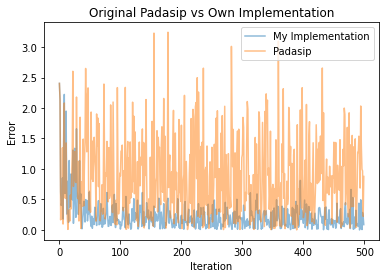

In [398]:
weights, iterError, errorAll, randError = RLS(X, y, 0.98)
iterError = iterError
f = FilterRLS(features, mu=0.98, eps=0.01, w="zeros")
preds, e, hist = f.run(y, X)
print("M Weights MSE: ",mse(weights, wTrue))
e = [np.linalg.norm(i) for i in e]
weights = hist[-1].reshape(-1, 1)
print("P Weights MSE: ",mse(weights, wTrue))


plt.plot(iterError, alpha=0.5, label="My Implementation")
plt.plot(e, alpha=0.5, label="Padasip")
plt.legend()

plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Original Padasip vs Own Implementation")

print(mse(e, iterError))

plt.savefig("OrigPadasip")

In [399]:
import numpy as np

from padasip.filters.base_filter import AdaptiveFilter

class FilterRLS(AdaptiveFilter):
    """
    Adaptive RLS filter.
    
    **Args:**

    * `n` : length of filter (integer) - how many input is input array
      (row of input matrix)

    **Kwargs:**

    * `mu` : forgetting factor (float). It is introduced to give exponentially
      less weight to older error samples. It is usually chosen
      between 0.98 and 1.

    * `eps` : initialisation value (float). It is usually chosen
      between 0.1 and 1.

    * `w` : initial weights of filter. Possible values are:
        
        * array with initial weights (1 dimensional array) of filter size
    
        * "random" : create random weights
        
        * "zeros" : create zero value weights
    """ 

    def __init__(self, n, mu=0.99, eps=0.1, w="random"):
        self.kind = "RLS filter"
        if type(n) == int:
            self.n = n
        else:
            raise ValueError('The size of filter must be an integer') 
        self.mu = self.check_float_param(mu, 0, 1, "mu")
        self.eps = self.check_float_param(eps, 0, 1, "eps")
        self.init_weights(w, self.n)
        self.R = 1/self.eps * np.identity(n)
        self.w_history = False

    def adapt(self, d, x):
        """
        Adapt weights according one desired value and its input.

        **Args:**

        * `d` : desired value (float)

        * `x` : input array (1-dimensional array)
        """
        y = np.dot(self.w, x)
        e = d - y
        R1 = np.dot(np.dot(np.dot(self.R,x),x.T),self.R)
        R2 = self.mu + np.dot(np.dot(x,self.R),x.T)
        self.R = 1/self.mu * (self.R - R1/R2)
        dw = np.dot(self.R, x.T) * e
        self.w += dw


    def run(self, d, x):
        """
        This function filters multiple samples in a row.

        **Args:**

        * `d` : desired value (1 dimensional array)

        * `x` : input matrix (2-dimensional array). Rows are samples,
            columns are input arrays.

        **Returns:**

        * `y` : output value (1 dimensional array).
          The size corresponds with the desired value.

        * `e` : filter error for every sample (1 dimensional array).
          The size corresponds with the desired value.

        * `w` : history of all weights (2 dimensional array).
          Every row is set of the weights for given sample.
        """
        # measure the data and check if the dimmension agree
        N = len(x)
        if not len(d) == N:
            raise ValueError('The length of vector d and matrix x must agree.')  
        self.n = len(x[0])
        # prepare data
        try:    
            x = np.array(x)
            d = np.array(d)
        except:
            raise ValueError('Impossible to convert x or d to a numpy array')
        # create empty arrays
        y = np.zeros(N)
        e = np.zeros(N)
        self.w_history = np.zeros((N, self.n))
        # adaptation loop
        for k in range(N):
            self.w_history[k,:] = self.w
            y[k] = np.dot(self.w, x[k])
            e[k] = d[k] - y[k]
            R1 = np.dot(np.dot(np.dot(self.R,x[k]).reshape(-1,1),x[k].reshape(1,-1)),self.R)
            R2 = self.mu + np.dot(np.dot(x[k],self.R),x[k].T)
            self.R = 1/self.mu * (self.R - R1/R2)
            dw = np.dot(self.R, x[k].T) * e[k]
            self.w += dw
        return y, e, self.w_history

M Weights MSE:  0.003737807025432581
P Weights MSE:  0.0038019119612741044
2.1465903402035307e-27


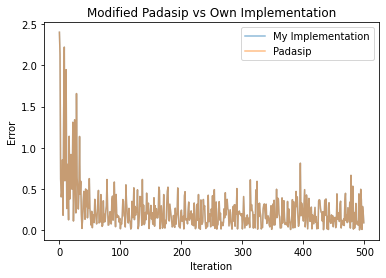

In [401]:
weights, iterError, errorAll, randError = RLS(X, y, 0.98)
iterError = iterError
f = FilterRLS(features, mu=0.98, eps=0.01, w="zeros")
preds, e, hist = f.run(y, X)
print("M Weights MSE: ",mse(weights, wTrue))
e = [np.linalg.norm(i) for i in e]
weights = hist[-1].reshape(-1, 1)
print("P Weights MSE: ",mse(weights, wTrue))

plt.plot(iterError, alpha=0.5, label="My Implementation")
plt.plot(e, alpha=0.5, label="Padasip")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Modified Padasip vs Own Implementation")
print(mse(e, iterError))
plt.savefig("ModPadasip")